In [1]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
summary = pd.read_csv('diag_2021_04_22_12_53_58.csv',index_col=False)
#summary

In [3]:
summary['pnts_secs'] = summary['pnts'] / 500
summary['time_retained'] = summary['manual'] / summary['pnts_secs']

In [4]:
summary['time_rejected'] = 1 - summary['time_retained']
summary['ch_s_sd_m_percent'] = summary['ch_s_sd_m'] / summary['pnts_secs']
summary['ch_sd_m_percent'] = summary['ch_sd_m'] / summary['pnts_secs']
summary['low_r_m_percent'] = summary['low_r_m'] / summary['pnts_secs']
summary['ic_sd1_m_percent'] = summary['ic_sd1_m'] / summary['pnts_secs']
summary['ic_sd2_m_percent'] = summary['ic_sd2_m'] / summary['pnts_secs']
summary['mark_gap_percent'] = summary['mark_gap'] / summary['pnts_secs']

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
summary

,fname,nbchan,pnts,srate,manual,ch_s_sd_m,ch_s_sd_b_m,ch_sd_m,ch_sd_b_m,low_r_m,ic_sd1_m,ic_sd1_b_m,ic_sd2_m,mark_gap,ch_s_sd_b-ch_sd_b,ch_s_sd_b-ic_sd1_b,ch_sd_b-ic_sd1_b,low_r_m-ic_sd1_b,manual_only,non_manual,remaining,ch_s_sd,ch_sd,low_r,bridge,LtModelMean,LtModelStd,Lt_quant_0.05,Lt_quant_0.15,Lt_quant_0.25,Lt_quant_0.5,Lt_quant_0.75,Lt_quant_0.85,Lt_quant_0.95,manual_comp_1,ic_rt_1,linkpvaluesMean,linkpvaluesStd,lpv_quant_0.05,lpv_quant_0.15,lpv_quant_0.25,lpv_quant_0.5,lpv_quant_0.75,lpv_quant_0.85,lpv_quant_0.95,tvar_mean,tvar_std,tvar_quant_0.05,tvar_quant_0.15,tvar_quant_0.25,tvar_quant_0.5,tvar_quant_0.75,tvar_quant_0.85,tvar_quant_0.95,pvar_mean,pvar_std,pvar_quant_0.05,pvar_quant_0.15,pvar_quant_0.25,pvar_quant_0.5,pvar_quant_0.75,pvar_quant_0.85,pvar_quant_0.95
0,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,470000,500,379.002,196,99,0,0,0,30,41,11,10.040,0,10,0,0,2.002,0,560.998,14,0,0,6,-371.9486,38.5676,-445.9935,-415.0881,-396.9877,-361.5289,-341.1211,-335.0296,-327.1257,83,18,0.00051598 1.7807e-05 3.0334e-05,0.00151 2.9394e-05 0.00010531,8.477200e-08,5.795600e-07,2.576900e-06,0.000029,0.000261,0.000709,0.002468,22.0849,14.9617,10.5466,12.5848,14.2119,18.5269,25.5558,30.6558,43.7574,10.3092,3.5778,5.5878,6.8544,7.7412,9.7308,12.2456,13.8352,17.0001
1,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,594000,500,573.808,277,105,0,0,0,59,79,32,11.044,0,22,0,0,32.808,0,614.192,2,0,0,3,-404.3954,38.7320,-487.6522,-442.8286,-421.1861,-392.8474,-376.8453,-370.8270,-362.5465,85,114,0.00025059 0.00056381 7.4514e-05,0.00028465 0.0013968 4.4285e-05,7.756900e-10,1.652700e-05,4.917300e-05,0.000137,0.000410,0.000614,0.000813,52.0222,463.9968,9.9094,11.5322,12.7369,15.7000,20.1035,23.6967,35.1078,10.6696,6.1555,5.7519,6.9027,7.7365,9.6382,12.1784,13.8849,17.7583
2,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,313000,500,222.094,95,79,0,0,0,7,14,3,4.016,0,2,0,0,22.094,0,403.906,11,0,0,10,-336.1546,39.3770,-410.5625,-378.5856,-360.1865,-329.0509,-305.3589,-296.4463,-285.4950,69,34,1.658e-05 1.8187e-05 0.00062078,3.1108e-05 3.8378e-05 0.0022327,4.394900e-10,1.699200e-08,1.271200e-07,0.000002,0.000014,0.000046,0.000099,25.3134,32.4721,10.2553,12.7980,14.6939,19.3490,26.7086,32.6072,49.7487,12.6972,4.8254,6.4876,8.1306,9.2997,11.8899,15.1462,17.2771,21.7066
3,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,304500,500,121.028,17,25,0,0,0,26,37,10,7.028,0,4,0,0,3.028,0,487.972,2,1,0,9,-362.9246,40.7274,-439.8774,-403.7557,-386.4254,-359.7671,-329.4846,-318.7742,-308.7529,76,54,0.00059609 3.95e-05 5.1618e-05,0.0015178 4.0607e-05 0.00010512,8.442700e-08,1.274100e-05,4.460200e-05,0.000132,0.000417,0.000975,0.002366,34.4614,89.1497,8.8173,10.7428,12.0966,15.3589,21.4927,31.3397,88.7624,8.9191,3.0751,4.7722,5.9286,6.7161,8.4579,10.6321,11.9650,14.5933
4,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,272500,500,207.000,88,81,0,0,0,12,18,5,7.026,0,4,0,0,0.000,0,338.000,4,0,0,11,-373.9540,41.0254,-452.8411,-417.3565,-397.0508,-366.5350,-342.0642,-332.7624,-322.5338,43,47,5.6879e-05 4.7247e-05 3.428e-05,0.00015722 7.229e-05 6.5758e-05,5.013800e-09,2.049800e-07,9.291700e-07,0.000018,0.000062,0.000102,0.000174,27.4804,25.7621,11.7318,14.3481,16.3090,21.2223,28.7438,34.6083,60.2053,23.1662,24.7731,9.8516,12.0150,13.5964,17.4256,23.1684,27.5025,50.1735
5,/Volumes/seh33@uw.ed/UCSD/derivatives/BIDS-Los...,128,332000,500,163.636,34,44,0,0,0,32,38,12,8.032,0,8,0,0,3.636,0,500.364,9,0,0,14,-298.5112,31.6201,-361.1074,-329.5002,-314.1299,-292.2537,-276.1475,-269.1342,-258.3652,57,48,3.9322e-05 8.7755e-05 0.00028921,4.5666e-05 0.00022439 0.00068723,1.045700e-07,5.526400e-07,7.047000e-06,0.000023,0.000055,0.000090,0.000147,58.5821,368.8675,8.7537,10.8958,12.5700,16.9418,23.9106,30.4500,59.7736,10.6708,4.3446,5.4137,6.8072,7.7854,9.9562,12.6878,14.4577,17.9865


In [6]:
avgs_proportions = summary[['time_retained','time_rejected','ch_s_sd_m_percent','ch_sd_m_percent','low_r_m_percent','ic_sd1_m_percent','ic_sd2_m_percent','mark_gap_percent']].mean()

In [17]:
summarydf = pd.DataFrame({
    'Flags':['Manual','staging','scalp_voltage','low_correlation_neighbors','ICA1','ICA2','nontasktime'],
    'mean_seconds':[summary.manual.mean(),summary.ch_s_sd_m.mean(),summary.ch_sd_m.mean(),summary.low_r.mean(),summary.ic_sd1_m.mean(),summary.ic_sd2_m.mean(),summary.mark_gap.mean()],
    'Standard_dev':[summary.manual.std(),summary.ch_s_sd_m.std(),summary.ch_sd_m.std(),summary.low_r.std(),summary.ic_sd1_m.std(),summary.ic_sd2_m.std(),summary.mark_gap.std()]
    
})
summarydf

,Flags,mean_seconds,Standard_dev
0,Manual,277.761333,169.463417
1,staging,117.833333,100.050820
2,scalp_voltage,0.000000,0.000000
3,low_correlation_neighbors,0.000000,0.000000
4,ICA1,27.666667,18.337575
5,ICA2,12.166667,10.342469
6,nontasktime,7.864333,2.493345


([<matplotlib.patches.Wedge at 0x120642410>,
 [Text(0.4541891376792754, 1.0018543942181202, 'rejected'),
  Text(-0.4541892314796512, -1.0018543516938598, 'retained')],
 [Text(0.24773952964324109, 0.5464660332098836, '36.5%'),
  Text(-0.24773958080708244, -0.5464660100148325, '63.5%')])

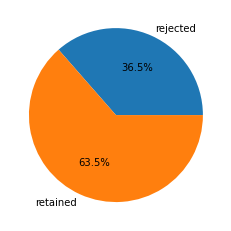

In [7]:
jnk = summary[['manual','remaining']].mean()
y = jnk
mylabels = ['rejected','retained']
plt.pie(y, labels = mylabels, autopct='%1.1f%%')

In [15]:
flagdf = pd.DataFrame({
    'Flags':['staging','scalp_voltage','low_correlation_neighbors','ICA1','ICA2','nontasktime'],
    'seconds':[summary.ch_s_sd_m.mean(),summary.ch_sd_m.mean(),summary.low_r.mean(),summary.ic_sd1_m.mean(),summary.ic_sd2_m.mean(),summary.mark_gap.mean()],
    'manual':[summary.manual.mean(),summary.manual.mean(),summary.manual.mean(),summary.manual.mean(),summary.manual.mean(),summary.manual.mean()]
    
})
flagdf

,Flags,seconds,manual
0,staging,117.833333,277.761333
1,scalp_voltage,0.000000,277.761333
2,low_correlation_neighbors,0.000000,277.761333
3,ICA1,27.666667,277.761333
4,ICA2,12.166667,277.761333
5,nontasktime,7.864333,277.761333


,Flags,seconds,manual
0,staging,117.833333,277.761333
1,scalp_voltage,0.000000,277.761333
2,low_correlation_neighbors,0.000000,277.761333
3,ICA1,27.666667,277.761333
4,ICA2,12.166667,277.761333
5,nontasktime,7.864333,277.761333


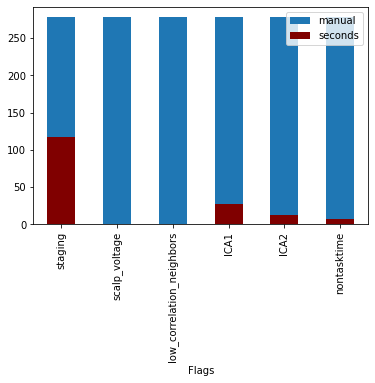

In [16]:
# plotting Height
ax = flagdf.plot(x="Flags", y="manual", kind="bar")
# plotting age on the same axis
flagdf.plot(x="Flags", y="seconds", kind="bar", ax=ax, color="maroon")
flagdf

([<matplotlib.patches.Wedge at 0x120850790>,
 [Text(0.21459935421774115, 1.0788638084435536, 'staging'),
  Text(-1.0294965198109545, 0.38747505170931096, 'channel_variance'),
  Text(-1.041623143134301, 0.3535834098017321, 'low_correlation_neighbors'),
  Text(-0.17918508635965108, -1.085307654458534, 'bridging')],
 [Text(0.11705419320967697, 0.5884711682419382, '43.8%'),
  Text(-0.5615435562605205, 0.21135002820507867, '1.0%'),
  Text(-0.568158078073255, 0.19286367807367202, '0.0%'),
  Text(-0.09773731983253695, -0.5919859933410184, '55.2%')])

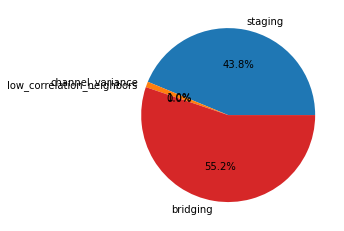

In [11]:
chansdf = summary[['ch_s_sd','ch_sd','low_r','bridge']].mean()
y = chansdf
mylabels = ['staging','channel_variance','low_correlation_neighbors','bridging']
plt.pie(y, labels = mylabels, autopct='%1.1f%%',labeldistance=1.1)